# VacationPy
----

#### Note
* Keep an eye on your API usage. Use https://developers.google.com/maps/reporting/gmp-reporting as reference for how to monitor your usage and billing.

* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os

# Import API key
from api_keys import g_key

### Store Part I results into DataFrame
* Load the csv exported in Part I to a DataFrame

In [2]:
#load csv
city_data='output/cities.csv'
#read csv
city=pd.read_csv(city_data)
city.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,biak,-0.9131,122.8766,80.67,76,96,3.22,ID,1618461958
1,shimoda,34.6667,138.9500,55.40,47,75,9.22,JP,1618461958
2,rikitea,-23.1203,-134.9692,78.57,72,13,8.68,PF,1618461805
3,tromso,69.6496,18.9570,33.80,93,90,17.27,NO,1618461959
4,port blair,11.6667,92.7500,85.68,66,100,4.97,IN,1618461904


### Humidity Heatmap
* Configure gmaps.
* Use the Lat and Lng as locations and Humidity as the weight.
* Add Heatmap layer to map.

In [3]:
#configure gmaps with API key
gmaps.configure(api_key=g_key)

In [4]:
#store Lat and Lng into locations
citytrim=city.dropna()
locations=citytrim[['Lat', 'Lng']].astype(float)
humidity=citytrim['Humidity'].astype(float)

### Create new DataFrame fitting weather criteria
* Narrow down the cities to fit weather conditions.
* Drop any rows will null values.

In [6]:
#create heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=humidity, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)

fig.add_layer(heat_layer)
#fig

screenshot of heatmap

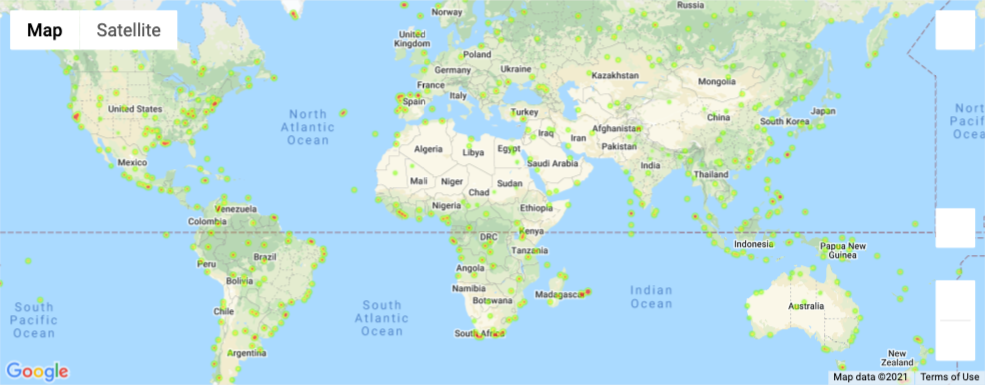

### Hotel Map
* Store into variable named `hotel_df`.
* Add a "Hotel Name" column to the DataFrame.
* Set parameters to search for hotels with 5000 meters.
* Hit the Google Places API for each city's coordinates.
* Store the first Hotel result into the DataFrame.
* Plot markers on top of the heatmap.

In [7]:
vaccity1=citytrim[(citytrim['Max Temp']>=65)&(citytrim['Max Temp']<=85)]
vaccity2=vaccity1[(vaccity1['Wind Speed']<=10)]
vaccity=vaccity2[(vaccity2['Cloudiness']<10)]
vaccity.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
26,tecoanapa,18.4273,-68.9728,69.19,75,3,8.28,DO,1618461924
33,upernavik,-21.2078,-159.7750,80.60,69,3,6.91,CK,1618461970
42,kulhudhuffushi,-29.6643,17.8865,70.50,25,1,6.40,ZA,1618461974
45,mahebourg,-24.7117,33.8828,66.92,86,0,1.14,MZ,1618461975
71,brae,-32.7167,152.1500,78.01,50,0,8.05,AU,1618461984


In [8]:
hotel_df=vaccity[['City', 'Country', 'Lat', 'Lng']].copy()
hotel_df["Hotel Name"] = ""

In [9]:
#find the cloest hotel
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
locations=hotel_df[["Lat", "Lng"]].astype(float)
params = {"rankby": "distance",
    "type": "hotel",
    "key": g_key,
}
for index, x in hotel_df.iterrows():
    params["location"]=f"{x['Lat']},{x['Lng']}"
    response = requests.get(base_url, params=params).json()
    results = response['results']
    
    try:
        print(f"found hotel {results[0]['name']}")
        hotel_df.loc[index,"Hotel Name"]=results[0]['name']
        
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
        
hotel_df.head()

found hotel Club Deportivo Chola
found hotel Ministry of Justice
found hotel Checkers LiquorShop Springbok Plaza
found hotel Estação Postal Correios de Manjacaze
found hotel Kayak Tour Departure Point
found hotel Pocinho
found hotel El Guarichi
found hotel Centre Communal d'Action Sociale
found hotel مسجد زغره
found hotel radio popularisima fm 100.3
found hotel Olive Tans Batemans Bay
found hotel Garage
found hotel Plenty Foods
found hotel Orla de Barão de Melgaço - Rio Cuiabá
found hotel campo de futbol
found hotel Escritorio de Advocacia
found hotel Témoins de Jéhovah
found hotel Sunny™ Mini Mart
found hotel Coco lak
found hotel J Argent
found hotel الجامع الكبير
found hotel Jindabyne Rd opp Malacoota Way
found hotel Policlinico Baragua
found hotel Cowboy Fellowship of San Patricio County
found hotel Betioky- Sud Health Centre
found hotel Área de Proteção Ambiental da Baleia Franca
found hotel Mohamed Saleh Harb Secondary Mechanical School
found hotel World Class Homes Mexico - Puert

,City,Country,Lat,Lng,Hotel Name
26,tecoanapa,DO,18.4273,-68.9728,Club Deportivo Chola
33,upernavik,CK,-21.2078,-159.7750,Ministry of Justice
42,kulhudhuffushi,ZA,-29.6643,17.8865,Checkers LiquorShop Springbok Plaza
45,mahebourg,MZ,-24.7117,33.8828,Estação Postal Correios de Manjacaze
71,brae,AU,-32.7167,152.1500,Kayak Tour Departure Point


In [10]:
# NOTE: Do not change any of the code in this cell

# Using the template add the hotel marks to the heatmap
info_box_template = """
<dl>
<dt>Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]
locations = hotel_df[["Lat", "Lng"]]

In [12]:
# Add marker layer ontop of heat map
markers = gmaps.marker_layer(locations,info_box_content=hotel_info)
# Add the layer to the map
fig.add_layer(markers)
#fig



It looks like there are lots of wonderful places I can visit!
screenshot of map

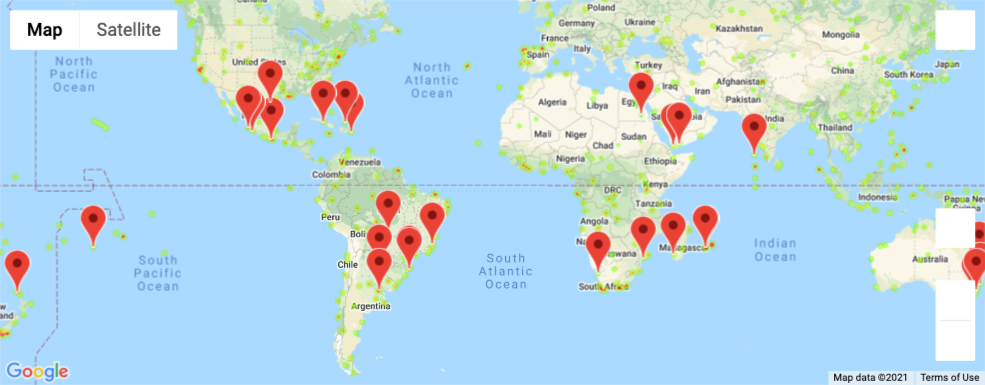